In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/tflow/fake_reg.csv')

In [3]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

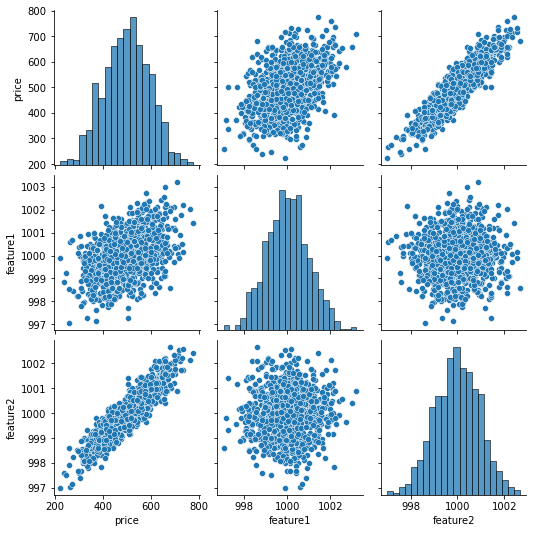

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1', 'feature2']].values

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train = scaler.transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [25]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 985us/step - loss: 256660.4844
Epoch 2/250
22/22 [==============================] - 0s 850us/step - loss: 256554.7031
Epoch 3/250
22/22 [==============================] - 0s 833us/step - loss: 256443.2500
Epoch 4/250
22/22 [==============================] - 0s 871us/step - loss: 256318.7500
Epoch 5/250
22/22 [==============================] - 0s 946us/step - loss: 256179.1250
Epoch 6/250
22/22 [==============================] - 0s 824us/step - loss: 256020.3438
Epoch 7/250
22/22 [==============================] - 0s 783us/step - loss: 255832.9219
Epoch 8/250
22/22 [==============================] - 0s 736us/step - loss: 255606.0156
Epoch 9/250
22/22 [==============================] - 0s 845us/step - loss: 255339.4062
Epoch 10/250
22/22 [==============================] - 0s 762us/step - loss: 255036.7031
Epoch 11/250
22/22 [==============================] - 0s 885us/step - loss: 254700.4375
Epoch 12/250
22/22 [=====================

22/22 [==============================] - 0s 829us/step - loss: 2510.3853
Epoch 95/250
22/22 [==============================] - 0s 823us/step - loss: 2308.0442
Epoch 96/250
22/22 [==============================] - 0s 867us/step - loss: 2259.6973
Epoch 97/250
22/22 [==============================] - 0s 792us/step - loss: 2227.8159
Epoch 98/250
22/22 [==============================] - 0s 784us/step - loss: 2191.6609
Epoch 99/250
22/22 [==============================] - 0s 884us/step - loss: 2166.7112
Epoch 100/250
22/22 [==============================] - 0s 875us/step - loss: 2134.5352
Epoch 101/250
22/22 [==============================] - 0s 817us/step - loss: 2103.6057
Epoch 102/250
22/22 [==============================] - 0s 794us/step - loss: 2074.9790
Epoch 103/250
22/22 [==============================] - 0s 792us/step - loss: 2043.2476
Epoch 104/250
22/22 [==============================] - 0s 839us/step - loss: 2009.6249
Epoch 105/250
22/22 [==============================] - 0s 797u

22/22 [==============================] - 0s 767us/step - loss: 122.6287
Epoch 190/250
22/22 [==============================] - 0s 818us/step - loss: 114.3729
Epoch 191/250
22/22 [==============================] - 0s 801us/step - loss: 106.0788
Epoch 192/250
22/22 [==============================] - 0s 794us/step - loss: 96.8611
Epoch 193/250
22/22 [==============================] - 0s 784us/step - loss: 89.7268
Epoch 194/250
22/22 [==============================] - 0s 781us/step - loss: 83.2689
Epoch 195/250
22/22 [==============================] - 0s 774us/step - loss: 77.5548
Epoch 196/250
22/22 [==============================] - 0s 799us/step - loss: 71.7815
Epoch 197/250
22/22 [==============================] - 0s 913us/step - loss: 66.9825
Epoch 198/250
22/22 [==============================] - 0s 799us/step - loss: 61.8177
Epoch 199/250
22/22 [==============================] - 0s 807us/step - loss: 57.0216
Epoch 200/250
22/22 [==============================] - 0s 814us/step - loss:

In [27]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

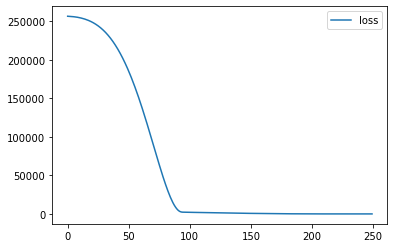

In [29]:
loss_df.plot()

In [31]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 932us/step - loss: 25.0923


25.092336654663086

In [32]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 725us/step - loss: 23.7377


23.737743377685547

In [33]:
predictions = model.predict(X_test)

10/10 [==============================] - 0s 1ms/step


In [40]:
test_predictions = pd.Series(predictions.reshape(300,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [41]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [42]:
pred_df.columns = ['True Y', 'Predictions']

<AxesSubplot:xlabel='True Y', ylabel='Predictions'>

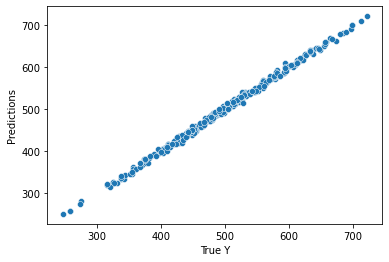

In [43]:
sns.scatterplot(pred_df, x='True Y', y='Predictions')

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
mean_absolute_error(pred_df['True Y'], pred_df['Predictions'])

4.01715991806038

In [46]:
mean_squared_error(pred_df['True Y'], pred_df['Predictions'])

25.092340167592845

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save('data/tflow/gem_model.h5')

In [49]:
later_model = load_model('data/tflow/gem_model.h5')